In [1]:
import data_utils
import pandas as pd
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
%matplotlib inline
warnings.filterwarnings('ignore')

df = data_utils.get_dataset()

dataset = df.copy()
dataset = dataset.astype(str)
dataset = dataset.drop_duplicates()

display(dataset.head())
print(f'dataset.shape: {dataset.shape}')
set(dataset['RIESGO_VIDA'].values)

,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_ESTADO,PQR_GRUPOALERTA,PQR_TIPOATENCION,PQR_TIPOPETICION,RIESGO_VIDA,TRIM
0,bogota d.c.,de 13 a 17 años,ninguno,mujer,no aplica,bogotá,otro,no aplica,subsidiado,natural,...,bogotá,juridica,escrito,pqr,cerrado,0,peticion directa,reclamo,no,trim i
1,nariño,de 0 a 5 años,ninguno,hombre,no aplica,puerres,otro,no aplica,subsidiado,natural,...,puerres,natural,telefonico,pqr,cerrado,0,0,reclamo,no,trim i
2,valle,de 13 a 17 años,secundaria,hombre,no aplica,cali,abuelo (a),no aplica,contributivo,natural,...,cali,natural,telefonico,pqr,cerrado,0,0,reclamo,no,trim i
3,huila,de 13 a 17 años,universitario incompleto,hombre,no aplica,neiva,padre,no aplica,contributivo,natural,...,neiva,natural,personalizado,pqr,cerrado,0,0,reclamo,no,trim i
4,risaralda,de 13 a 17 años,ninguno,hombre,no aplica,dosquebradas,padre,persona en condición de discapacidad,contributivo,natural,...,dosquebradas,natural,personalizado,pqr,pendiente (avance),0,0,reclamo,si,trim i


dataset.shape: (1985682, 46)


{'0', 'no', 'si'}

In [2]:
dataset = dataset[dataset['RIESGO_VIDA'] != '0']
dataset = dataset[dataset['AFEC_GENERO'] != '0']
dataset = dataset[dataset['CIE_10'] != '0']
dataset = dataset.applymap(lambda col: None if col == '0' else col)
print(f'dataset.shape: {dataset.shape}')


dataset.shape: (276514, 46)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_missing_values(dataset):
    zero_df = dataset.isnull().mean().to_frame(name = 'missing')
    non_zero_df = dataset.notnull().mean().to_frame(name = 'not_missing')
    missing_values = pd.concat([zero_df, non_zero_df], axis=1, sort=False)
    missing_values['total'] = missing_values['missing'] + missing_values['not_missing'] 

    
    plt.figure(figsize=(15,5))

    features = list(missing_values.index)
    width = .7
    ind = np.arange(len(features)) 

    plot_missing = plt.bar(ind, missing_values['missing'], width, color = 'red', alpha = 0.3)
    plot_not_missing = plt.bar(ind, missing_values['not_missing'], width, color = 'green', alpha = 0.3, bottom=missing_values['missing'])

    plt.ylabel('%')
    plt.title('% Missing values')
    plt.xticks(ind, tuple(features))
    plt.yticks(np.arange(0, .8, 1))
    plt.legend((plot_missing[0], plot_not_missing[0]), ('Missing', 'Not missing'), bbox_to_anchor=(1.05, 1), borderaxespad=0., loc='upper right')
    plt.xticks(rotation=45, ha='right')

    plt.show()

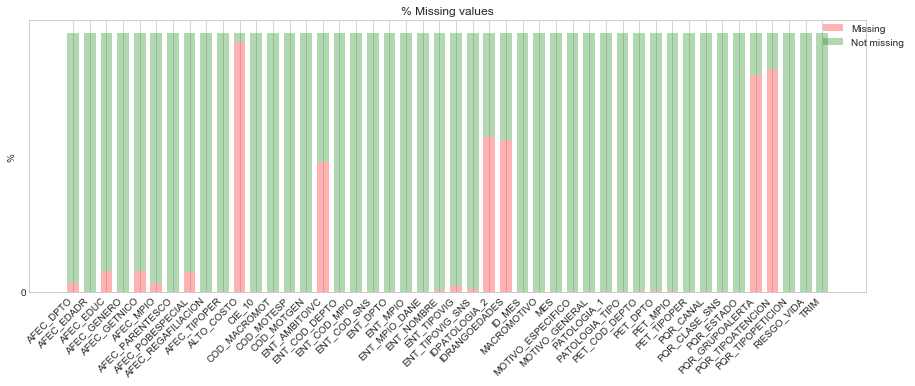

dataset.shape: (276514, 46)


In [4]:
plot_missing_values(dataset)
print(f'dataset.shape: {dataset.shape}')


In [ ]:
from sklearn import preprocessing
dataset_lbl_encoded = dataset.astype(str)
le = preprocessing.LabelEncoder()
for column in dataset_lbl_encoded.columns:
    le.fit(dataset_lbl_encoded[column])
    dataset_lbl_encoded[column] = le.transform(dataset_lbl_encoded[column]) 

dataset_lbl_encoded.head()
print(dataset_lbl_encoded.shape)

(276514, 46)


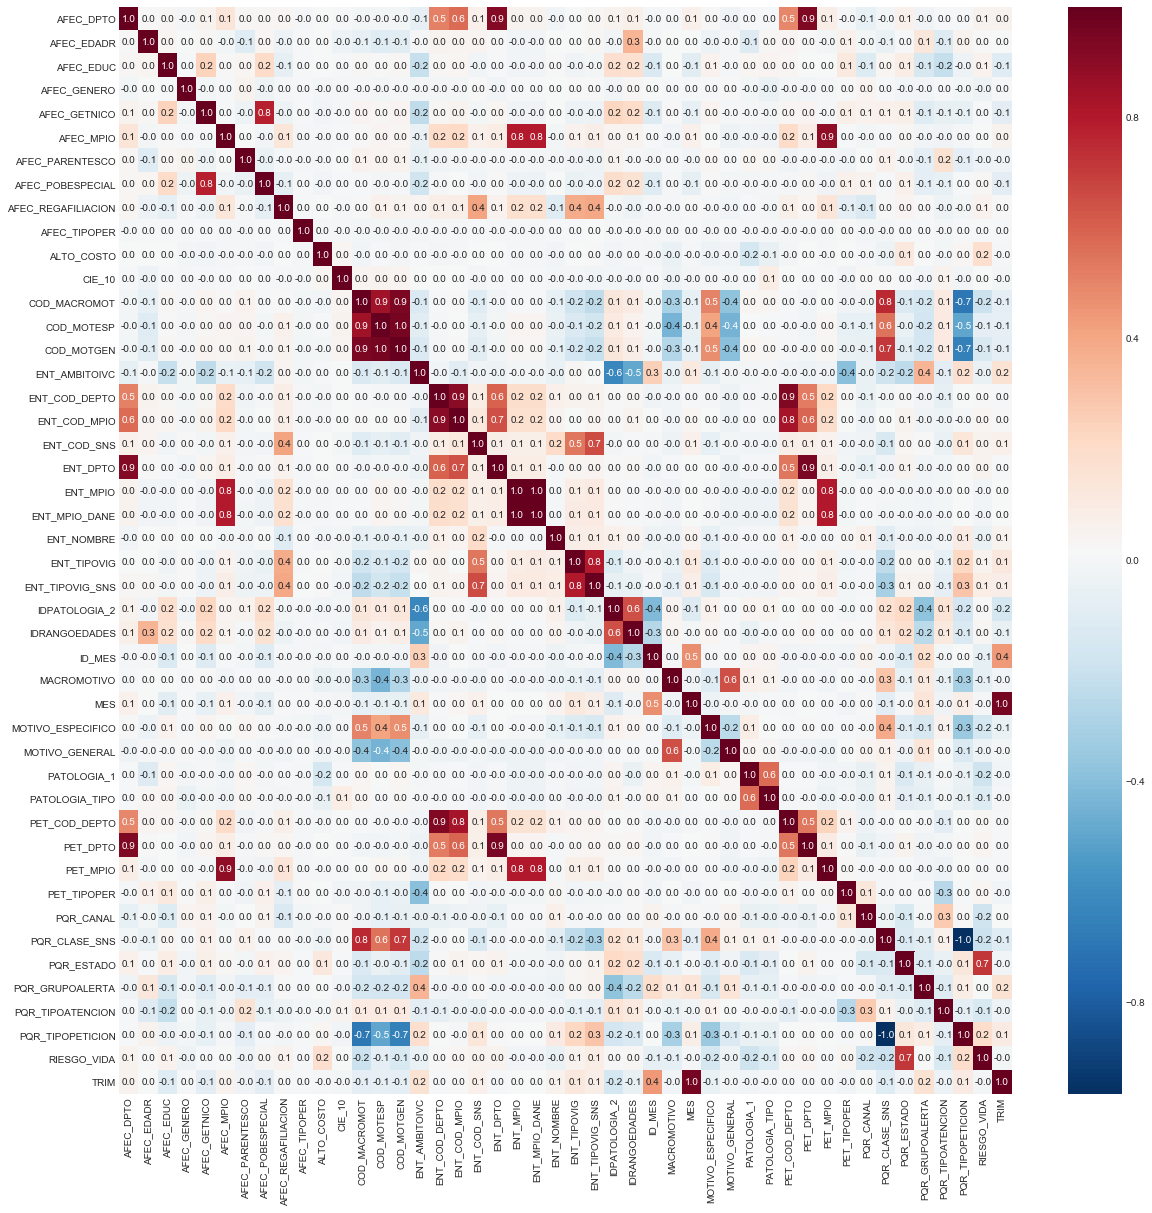

In [ ]:
import seaborn as sns
plt.figure(figsize=(20, 20))

ax = sns.heatmap(dataset_lbl_encoded.corr(), cmap = "RdBu_r", annot=True, fmt='.1f')

In [ ]:
dataset_lbl_encoded = dataset_lbl_encoded.drop(
        [
            'AFEC_GETNICO', 
            'AFEC_POBESPECIAL', 
            'AFEC_TIPOPER',
            'ALTO_COSTO',
            'COD_MACROMOT',
            'MACROMOTIVO',
            'PATOLOGIA_1',
            'PATOLOGIA_TIPO',
            'PET_TIPOPER',
            'PQR_CLASE_SNS',
            'PQR_ESTADO',
            'PQR_GRUPOALERTA',
            'PQR_TIPOATENCION',
            'PQR_TIPOPETICION'
            
        ], axis = 1)

dataset_lbl_encoded.to_csv('datasets/dataset_lbl_encoded.csv', index = False)

In [ ]:
s = pd.Series(list('abca'))
print(s)
pd.get_dummies(s)

0    a
1    b
2    c
3    a
dtype: object


,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [ ]:
dataset_mot_esp_encoded = dataset.astype(str)

dataset_mot_esp_encoded = pd.get_dummies(dataset_mot_esp_encoded[['MOTIVO_ESPECIFICO']])
dataset_mot_esp_encoded['RIESGO_VIDA'] = dataset['RIESGO_VIDA'].apply(lambda value: 1 if value == 'si' else 0)
dataset_mot_esp_encoded.head()

,MOTIVO_ESPECIFICO_agente virtual,MOTIVO_ESPECIFICO_agradecimiento y/o felicitación,MOTIVO_ESPECIFICO_ambulancia innadecuada para el traslado del paciente segun el nivel de complejidad (referencia-contrarreferencia),MOTIVO_ESPECIFICO_barreras de acceso en la afiliacion (tramites no contemplados por la ley),MOTIVO_ESPECIFICO_beneficiarios que no corresponden.,MOTIVO_ESPECIFICO_cancer,MOTIVO_ESPECIFICO_certificacion de existencias,MOTIVO_ESPECIFICO_circular unica,MOTIVO_ESPECIFICO_citaciones y/o notificaciones supersalud,MOTIVO_ESPECIFICO_cobro de upc adicional,...,MOTIVO_ESPECIFICO_tramite de la referencia a cargo del usuario,"MOTIVO_ESPECIFICO_tramites administrativos para la afiliacion que son responsabilidad de la eps, trasladados al usuario.",MOTIVO_ESPECIFICO_tramites para inscripcion ante la supersalud,MOTIVO_ESPECIFICO_transferencia a la supersalud,MOTIVO_ESPECIFICO_transferencia entre asesores de contact center,MOTIVO_ESPECIFICO_traslado de municipio,MOTIVO_ESPECIFICO_trato indigno o deshumanizado,MOTIVO_ESPECIFICO_usuario desinformado frente al servicio de atencion en salud que le estan prestando.,MOTIVO_ESPECIFICO_vih sida y otras et sexual,RIESGO_VIDA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_corr = dataset_mot_esp_encoded.corr()['RIESGO_VIDA'].to_frame(name = 'corr')
df_corr.head()

,corr
MOTIVO_ESPECIFICO_agente virtual,-0.016484
MOTIVO_ESPECIFICO_agradecimiento y/o felicitación,-0.011227
MOTIVO_ESPECIFICO_ambulancia innadecuada para el traslado del paciente segun el nivel de complejidad (referencia-contrarreferencia),0.005012
MOTIVO_ESPECIFICO_barreras de acceso en la afiliacion (tramites no contemplados por la ley),-0.008065
MOTIVO_ESPECIFICO_beneficiarios que no corresponden.,0.003084


In [ ]:
df_corr.sort_values(by = 'corr', ascending = False).head(10)

,corr
RIESGO_VIDA,1.000000
MOTIVO_ESPECIFICO_demora de la referencia o contrarreferencia,0.218211
MOTIVO_ESPECIFICO_demora de la autorizacion de servicios de alto costo para: cancer,0.150779
MOTIVO_ESPECIFICO_cancer,0.144023
MOTIVO_ESPECIFICO_fallas en la oportunidad para la ubicacion del usuario (referencia-contrarreferencia),0.091120
MOTIVO_ESPECIFICO_falta de oportunidad en la entrega de medicamentos no pos,0.056724
MOTIVO_ESPECIFICO_negacion de la autorizacion de servicios de alto costo para: cancer,0.045255
MOTIVO_ESPECIFICO_demora de la autorizacion de medicamentos no-pos.,0.043925
MOTIVO_ESPECIFICO_materno infantil,0.042307
MOTIVO_ESPECIFICO_enfermedades cronicas no trasmisibles cardiovasculares,0.038408


In [ ]:
set(dataset['AFEC_EDADR'].values)

{None,
 'de 0 a 5 años',
 'de 13 a 17 años',
 'de 18 a 24 años',
 'de 25 a 29 años',
 'de 30 a 37 años',
 'de 38 a 49 años',
 'de 50 a 62 años',
 'de 6 a 12 años',
 'mayor de 63 años'}

In [ ]:
set(dataset['AFEC_EDUC'].values)

{None,
 'ninguno',
 'posgrado',
 'primaria',
 'primaria incompleta',
 'secundaria',
 'secundaria incompleta',
 'universitario',
 'universitario incompleto'}

In [ ]:
def get_edad_order(value):
    value_range = {
        'de 0 a 5 años': 0,
        'de 13 a 17 años': 1,
        'de 18 a 24 años': 2,
        'de 25 a 29 años': 3,
        'de 30 a 37 años': 4,
        'de 38 a 49 años': 5,
        'de 50 a 62 años': 6,
        'de 6 a 12 años': 7,
        'mayor de 63 años': 8
            }
    return value_range.get(value, None)

def get_edu_order(value):
    value_range = {
        'ninguno': 0,
        'primaria incompleta': 1,
        'primaria': 2,
        'secundaria incompleta': 3, 
        'secundaria': 4,
        'universitario incompleto': 5,
        'universitario': 6,
        'posgrado': 7
    }
    return value_range.get(value, None)

In [ ]:
dataset_mix_encoded = dataset.copy()
dataset_mix_encoded['AFEC_EDADR'] = dataset_mix_encoded['AFEC_EDADR'].apply(get_edad_order)
dataset_mix_encoded['AFEC_EDUC'] = dataset_mix_encoded['AFEC_EDUC'].apply(get_edu_order)
dataset_mix_encoded[['AFEC_EDADR', 'AFEC_EDUC']].head()

,AFEC_EDADR,AFEC_EDUC
0,1.0,0.0
2,1.0,4.0
3,1.0,5.0
4,1.0,0.0
6,1.0,0.0


In [ ]:
columns_mix_encoded = list(dataset_mix_encoded.columns)
columns_mix_encoded.remove('AFEC_EDADR')
columns_mix_encoded.remove('AFEC_EDUC')
columns_mix_encoded

dataset_mix_encoded[columns_mix_encoded] = dataset_mix_encoded[columns_mix_encoded].astype(str)
le = preprocessing.LabelEncoder()
for column in columns_mix_encoded:
    le.fit(dataset_mix_encoded[column])
    dataset_mix_encoded[column] = le.transform(dataset_mix_encoded[column]) 

dataset_mix_encoded.head()

In [ ]:
plt.figure(figsize=(20, 20))

ax = sns.heatmap(dataset_mix_encoded.corr(), cmap = "RdBu_r", annot=True, fmt='.1f')